#  Python Data Analysis Toolchain

## Numpy

- Homepage: http://www.numpy.org/
- Reference: https://docs.scipy.org/doc/numpy/reference/

- Features:
  - n-dimensional array object

## What is an Numpy Array?

In [1]:
import json
import numpy as np
import binascii

In [2]:
%time X = json.load(open("datasets/http_durations_caql.json", "r"))

CPU times: user 10 ms, sys: 10 ms, total: 20 ms
Wall time: 7.06 ms


In [3]:
A = np.array(X, dtype = np.float64) # create tightly packed C-level data array

In [4]:
A

array([[  1.,   1.,   4., ...,   2.,  10.,   4.],
       [  1.,   1.,   1., ...,   1.,   1.,   3.],
       [  1.,   1.,   1., ...,   1.,   1.,   3.],
       ..., 
       [  2.,   1.,   1., ...,   1.,   1.,   3.],
       [  1.,   1.,   2., ...,   1.,   1.,   4.],
       [  1.,   1.,   1., ...,   1.,   1.,   3.]])

In [5]:
def arrinfo(A):
    print("Array memory statistics:")
    print("* Entry type:                    ", A.dtype)
    print("* Bytes consumed by each element:", A.itemsize)
    print("* Shape:                         ", A.shape)
    print("* Number of elements             ", A.size)
    print("* Bytes consumed in total:       ", A.nbytes)
    print("* Memory location:               ", A.data)
    print("* Memory contents:               ", binascii.hexlify(A.data.tobytes()[:10]).decode("ascii"), "...")
    print("* Strides:                       ", A.strides)

In [6]:
arrinfo(A)

Array memory statistics:
* Entry type:                     float64
* Bytes consumed by each element: 8
* Shape:                          (1440, 21)
* Number of elements              30240
* Bytes consumed in total:        241920
* Memory location:                <memory at 0x7fc778093630>
* Memory contents:                000000000000f03f0000 ...
* Strides:                        (168, 8)


## Storing and Loading np.arrays

In [7]:
# Dump internal memory representation
%time A.tofile("/tmp/example.data")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 694 µs


In [268]:
# Inspect file content
!stat /tmp/example.data
!echo
!xxd /tmp/example.data | head

  File: '/tmp/example.data'
  Size: 241920    	Blocks: 480        IO Block: 4096   regular file
Device: 801h/2049d	Inode: 3559112     Links: 1
Access: (0644/-rw-r--r--)  Uid: ( 1000/  jovyan)   Gid: (  100/   users)
Access: 2017-10-10 20:53:20.148602939 +0000
Modify: 2017-10-10 20:53:20.018701657 +0000
Change: 2017-10-10 20:53:20.018701657 +0000
 Birth: -

00000000: 0000 0000 0000 f03f 0000 0000 0000 f03f  .......?.......?
00000010: 0000 0000 0000 1040 0000 0000 0000 2840  .......@......(@
00000020: 0000 0000 0000 0840 0000 0000 0000 1040  .......@.......@
00000030: 0000 0000 0000 2640 0000 0000 0000 0840  ......&@.......@
00000040: 0000 0000 0000 0840 0000 0000 0000 2840  .......@......(@
00000050: 0000 0000 0000 f03f 0000 0000 0000 1040  .......?.......@
00000060: 0000 0000 0000 1840 0000 0000 0000 2840  .......@......(@
00000070: 0000 0000 0000 0840 0000 0000 0000 f03f  .......@.......?
00000080: 0000 0000 0000 2840 0000 0000 0000 0840  ......(@.......@
00000090: 0000 0000 0000 0040

In [9]:
# Read back data from file
%time B = np.fromfile("/tmp/example.data", dtype=np.float64)
B

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 267 µs


array([ 1.,  1.,  4., ...,  1.,  1.,  3.])

In [10]:
# all structure is lost. We need to manually restore the shape + dtype
C = B.reshape(A.shape)

In [11]:
# A better way to save np.arrays is to use np.save / np.load which preserves metadata about the array
np.save("/tmp/example.npy", A)

In [267]:
!stat /tmp/example.npy
!echo
!xxd /tmp/example.npy | head -n 10

  File: '/tmp/example.npy'
  Size: 242000    	Blocks: 480        IO Block: 4096   regular file
Device: 801h/2049d	Inode: 3559111     Links: 1
Access: (0644/-rw-r--r--)  Uid: ( 1000/  jovyan)   Gid: (  100/   users)
Access: 2017-10-10 20:53:20.408405499 +0000
Modify: 2017-10-10 20:53:20.288496625 +0000
Change: 2017-10-10 20:53:20.288496625 +0000
 Birth: -

00000000: 934e 554d 5059 0100 4600 7b27 6465 7363  .NUMPY..F.{'desc
00000010: 7227 3a20 273c 6638 272c 2027 666f 7274  r': '<f8', 'fort
00000020: 7261 6e5f 6f72 6465 7227 3a20 4661 6c73  ran_order': Fals
00000030: 652c 2027 7368 6170 6527 3a20 2831 3434  e, 'shape': (144
00000040: 302c 2032 3129 2c20 7d20 2020 2020 200a  0, 21), }      .
00000050: 0000 0000 0000 f03f 0000 0000 0000 f03f  .......?.......?
00000060: 0000 0000 0000 1040 0000 0000 0000 2840  .......@......(@
00000070: 0000 0000 0000 0840 0000 0000 0000 1040  .......@.......@
00000080: 0000 0000 0000 2640 0000 0000 0000 0840  ......&@.......@
00000090: 0000 0000 0000 0840 

In [13]:
# loading works without specifying dtype + shape
%time np.load("/tmp/example.npy")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.81 ms


array([[  1.,   1.,   4., ...,   2.,  10.,   4.],
       [  1.,   1.,   1., ...,   1.,   1.,   3.],
       [  1.,   1.,   1., ...,   1.,   1.,   3.],
       ..., 
       [  2.,   1.,   1., ...,   1.,   1.,   3.],
       [  1.,   1.,   2., ...,   1.,   1.,   4.],
       [  1.,   1.,   1., ...,   1.,   1.,   3.]])

## Working with Numpy Arrays

In [14]:
# Arrays can have arbitrary dimension

# 3 dimensional array
X=np.array([[[1,3,4],[1,2,3]],[[2,3,4],[5,6,7]]],dtype=np.int8)
arrinfo(X)

Array memory statistics:
* Entry type:                     int8
* Bytes consumed by each element: 1
* Shape:                          (2, 2, 3)
* Number of elements              12
* Bytes consumed in total:        12
* Memory location:                <memory at 0x7fc77c2c0a98>
* Memory contents:                01030401020302030405 ...
* Strides:                        (6, 3, 1)


In [15]:
A[0] # first column

array([  1.,   1.,   4.,  12.,   3.,   4.,  11.,   3.,   3.,  12.,   1.,
         4.,   6.,  12.,   3.,   1.,  12.,   3.,   2.,  10.,   4.])

In [16]:
arrinfo(A[0])

Array memory statistics:
* Entry type:                     float64
* Bytes consumed by each element: 8
* Shape:                          (21,)
* Number of elements              21
* Bytes consumed in total:        168
* Memory location:                <memory at 0x7fc7780d6a08>
* Memory contents:                000000000000f03f0000 ...
* Strides:                        (8,)


In [17]:
arrinfo(A[:,1]) # first row

Array memory statistics:
* Entry type:                     float64
* Bytes consumed by each element: 8
* Shape:                          (1440,)
* Number of elements              1440
* Bytes consumed in total:        11520
* Memory location:                <memory at 0x7fc7780d6a08>
* Memory contents:                000000000000f03f0000 ...
* Strides:                        (168,)


In [18]:
A[1:5,1:5] # indexing returns views of the original array. No data is copied. Mutations affect parent.

array([[  1.,   1.,  12.,   3.],
       [  1.,   1.,  11.,   3.],
       [  1.,   1.,  12.,   3.],
       [  1.,   1.,  12.,   3.]])

In [19]:
A[:,1].shape

(1440,)

In [20]:
# Broadcasting
A + 3

array([[  4.,   4.,   7., ...,   5.,  13.,   7.],
       [  4.,   4.,   4., ...,   4.,   4.,   6.],
       [  4.,   4.,   4., ...,   4.,   4.,   6.],
       ..., 
       [  5.,   4.,   4., ...,   4.,   4.,   6.],
       [  4.,   4.,   5., ...,   4.,   4.,   7.],
       [  4.,   4.,   4., ...,   4.,   4.,   6.]])

In [21]:
# Matrix Operations
A.T # transpose

array([[  1.,   1.,   1., ...,   2.,   1.,   1.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  4.,   1.,   1., ...,   1.,   2.,   1.],
       ..., 
       [  2.,   1.,   1., ...,   1.,   1.,   1.],
       [ 10.,   1.,   1., ...,   1.,   1.,   1.],
       [  4.,   3.,   3., ...,   3.,   4.,   3.]])

In [22]:
np.arange(0,10,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9])

In [23]:
np.linspace(0,10, 20)

array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
         2.10526316,   2.63157895,   3.15789474,   3.68421053,
         4.21052632,   4.73684211,   5.26315789,   5.78947368,
         6.31578947,   6.84210526,   7.36842105,   7.89473684,
         8.42105263,   8.94736842,   9.47368421,  10.        ])

In [24]:
# u-funcs

In [25]:
x = np.linspace(0, 1, 100000 ) # [a]rray-range

In [26]:
y = np.sin( np.pi * 1/(1-x+0.001) )

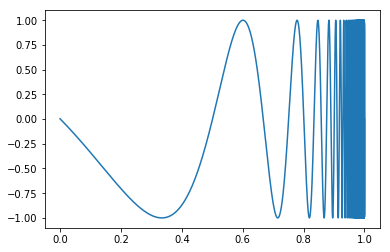

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(x,y)

In [28]:
# Boolean Indexing
L = np.arange(0,5,1)
L

array([0, 1, 2, 3, 4])

In [29]:
L[[False, False, True, True, True]]

array([2, 3, 4])

In [30]:
L < 3

array([ True,  True,  True, False, False], dtype=bool)

In [31]:
L[L<2] = 0

In [32]:
L

array([0, 0, 2, 3, 4])

## Matplotlib

- Homepage: http://matplotlib.org/
- Reference: http://matplotlib.org/api/index.html

- Features:
  - Plotting

- Remarks:
  - Python specific
  - Arguably R's ggplot2 is the cleaner framework.
  - Very mature

In [33]:
from matplotlib import pyplot as plt

In [34]:
np.array(X)

array([[[1, 3, 4],
        [1, 2, 3]],

       [[2, 3, 4],
        [5, 6, 7]]], dtype=int8)

In [35]:
# show graphs inside notebook
%matplotlib inline

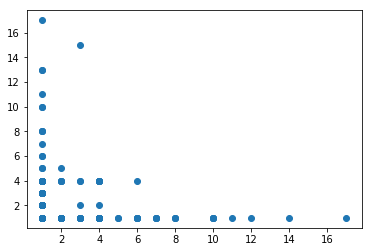

In [36]:
plt.scatter(A[:,1],A[:,5])

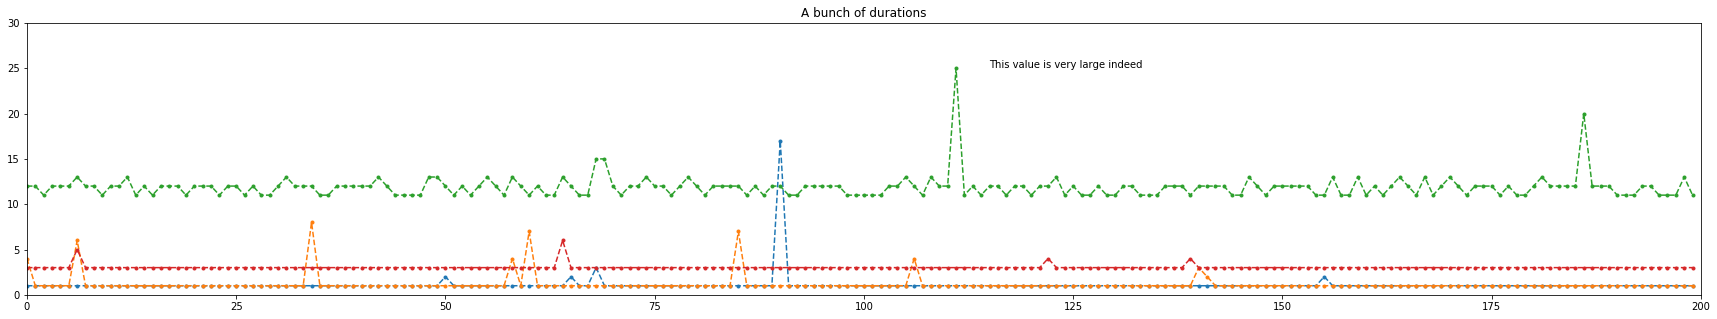

In [37]:
N = 200
plt.figure(1, figsize=(30,5))
plt.plot(A[:200,1:5],".--")
plt.title("A bunch of durations")
plt.ylim(0,30)
plt.xlim(0,200)
plt.text(115,25,"This value is very large indeed")

<Container object of 100 artists>

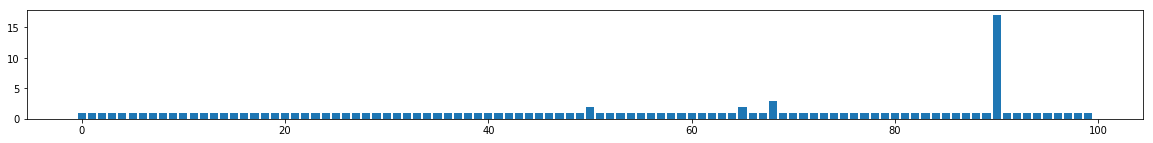

In [38]:
plt.figure(1,figsize=(20,2))
plt.bar(np.arange(0,100), A[:100,1],)

In [39]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


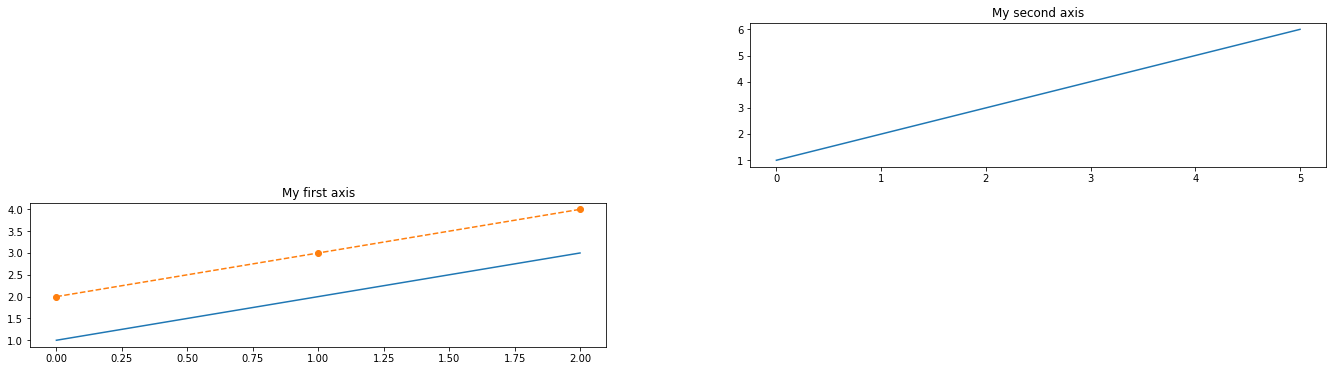

In [40]:
# Object Oriented Interface
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_axes((0,0,0.4,0.4))
ax2 = fig.add_axes((0.5,0.5,0.4,0.4))
ax1.plot([1,2,3])
ax1.plot([2,3,4],"o--")
ax2.plot([1,2,3,4,5,6])
ax1.set_title("My first axis")
ax2.set_title("My second axis")
fig.savefig("images/first_plot_2.png")
plt.show(fig)

* Saved image in Markdown Cell

![myfirstplot](images/first_plot.png)

## SciPy

- Homepage: https://www.scipy.org/
- Reference: https://docs.scipy.org/doc/scipy/reference/

- Features:
  - Statistics
  - Matrix Algebra

In [41]:
from scipy import linalg

In [42]:
A.dot(A.T) # Matrix Multiplication

array([[ 950.,  857.,  787., ...,  788.,  822.,  773.],
       [ 857.,  902.,  820., ...,  817.,  854.,  800.],
       [ 787.,  820.,  748., ...,  747.,  779.,  732.],
       ..., 
       [ 788.,  817.,  747., ...,  749.,  777.,  732.],
       [ 822.,  854.,  779., ...,  777.,  815.,  762.],
       [ 773.,  800.,  732., ...,  732.,  762.,  723.]])

In [43]:
A[np.isnan(A)] = 0

In [44]:
linalg.eigvals(A.dot(A.T))

array([  2.21798543e+07 +0.00000000e+00j,
         3.60294703e+06 +0.00000000e+00j,
         1.20720376e+06 +0.00000000e+00j, ...,
         4.61244778e-46 -1.67453971e-45j,
         2.81359455e-46 +1.34288297e-46j,   2.81359455e-46 -1.34288297e-46j])

In [45]:
from scipy import stats

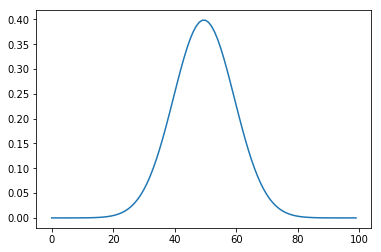

In [46]:
plt.plot([ stats.norm.pdf(x) for x in np.linspace(-5,5,100) ])

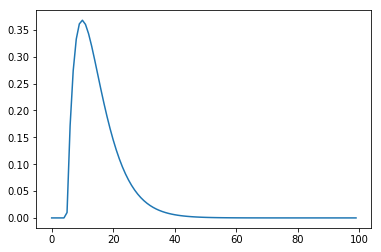

In [47]:
plt.plot([stats.gamma(2,1).pdf(x) for x in np.linspace(0,20,100)])

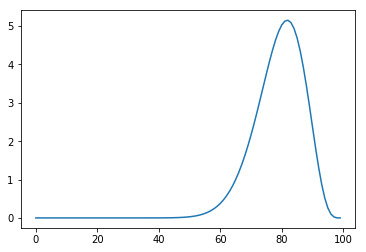

In [48]:
plt.plot([stats.beta.pdf(x,20,5) for x in np.linspace(0,1,100)])

## Pandas

- Homepage: http://pandas.pydata.org/
- Reference: http://pandas.pydata.org/pandas-docs/stable/api.html

- Features:
  - DataFrame object with Spreadsheet like capabilities
  - Data Cleaning / Munging
  - Time Series Analysis
  

In [49]:
import pandas as pd

In [120]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    See http://pandas.pydata.org/ for full documentation. Otherwise, see the
    docstrings of the various objects in the pandas namespace:
    
    Series
    DataFrame
    Panel
    Index
    DatetimeIndex
    HDFStore
    bdate_range
    date_range
    read_csv
    read_fwf
    read_table
    ols

PACKAGE CONTENTS
    _hash
    _join
    _period
    _sparse
    _testing
    _version
    _window
    algos
    api (package)
    compat (package)
    computation (package)
    core (package)
    formats (package)
    hashtable
    index
    indexes (package)
    info
    io (package)
    json
    lib
    msgpack (package)
    parser
    rpy (package)
    sparse (package)
    stats (package)
    tests (package)
    tools (package)
    tseries (package)
    tslib
    types (package)
    util (package)

SUBMODULES
    offsets

DATA
    IndexSlice = <pandas.cor

## What is a DataFrame?

In [50]:
d = pd.DataFrame([[1,2,3],[4,5,6]], columns=["a","b","c"], index=["2016-02-01","2017-01-01"])

In [121]:
d

,a,b,c
2016-02-01,1,2,3
2017-01-01,4,5,6


In [52]:
d.values # an numpy array

array([[1, 2, 3],
       [4, 5, 6]])

In [53]:
d.index # row index

Index(['2016-02-01', '2017-01-01'], dtype='object')

In [54]:
d.columns # column index

Index(['a', 'b', 'c'], dtype='object')

In [125]:
d.transpose() # columns and rows are interchangable

,2016-02-01,2017-01-01
a,1,4
b,2,5
c,3,6


In [128]:
col = d['a'] # access a colum by it's name, returns a Series object
col

2016-02-01    1
2017-01-01    4
Name: a, dtype: int64

In [132]:
type(col)

pandas.core.series.Series

In [131]:
# help(col) # get some help

In [140]:
# A Circonus -> Pandas data fetcher

# Excursion: writing python modules
%run CIRCAPI.ipynb

# Circonus Data Fetcher to Pandas
def circ_df_fetch(q, start, period, count):
    idx = [ pd.to_datetime(start + period * n, unit='s') for n in range(count) ]
    X = circ_search_fetch(q, start, period, count)
    return pd.DataFrame(X, index=idx)

In [191]:
from datetime import datetime
%time df = circ_df_fetch("(metric:duration)", datetime(2017,9,1).timestamp(), 60, 60 * 24 * 7)

fetching {'name': 'duration', 'check_id': '195902'}
fetching {'name': 'duration', 'check_id': '154743'}
fetching {'name': 'duration', 'check_id': '222868'}
fetching {'name': 'duration', 'check_id': '222866'}
fetching {'name': 'duration', 'check_id': '222867'}
fetching {'name': 'duration', 'check_id': '222865'}
fetching {'name': 'duration', 'check_id': '222863'}
fetching {'name': 'duration', 'check_id': '222864'}
fetching {'name': 'duration', 'check_id': '222861'}
fetching {'name': 'duration', 'check_id': '222860'}
fetching {'name': 'duration', 'check_id': '222862'}
fetching {'name': 'duration', 'check_id': '222859'}
fetching {'name': 'duration', 'check_id': '222858'}
fetching {'name': 'duration', 'check_id': '222857'}
fetching {'name': 'duration', 'check_id': '222855'}
fetching {'name': 'duration', 'check_id': '222856'}
fetching {'name': 'duration', 'check_id': '222854'}
fetching {'name': 'duration', 'check_id': '218002'}
fetching {'name': 'duration', 'check_id': '218003'}
fetching {'n

CPU times: user 2.2 s, sys: 820 ms, total: 3.02 s
Wall time: 1min 34s


In [ ]:
df.head()

In [ ]:
df.info()

In [261]:
df.describe()

,154743/duration,195902/duration,217834/duration,218002/duration,218003/duration,222854/duration,222855/duration,222856/duration,222857/duration,222858/duration,222859/duration,222860/duration,222861/duration,222862/duration,222863/duration,222864/duration,222865/duration,222866/duration,222867/duration,222868/duration
count,10075.000000,10080.000000,10079.000000,10080.00000,10075.000000,10080.000000,10079.000000,10075.000000,10080.000000,10080.000000,10078.00000,10080.000000,10080.000000,10077.000000,10080.000000,10080.000000,10077.000000,10078.000000,10080.000000,10074.000000
mean,1.397519,2.639484,1.284453,3.41627,1.210223,14.400446,3.137414,1.418859,12.809573,3.565675,1.34749,12.093552,3.503175,1.413814,12.949405,3.204167,1.261685,13.603245,3.154067,1.281815
std,2.826372,29.693884,1.440473,20.20111,1.258315,76.145112,0.978367,1.702642,26.287033,31.509096,11.40865,2.479788,29.894347,1.894404,28.073073,1.307849,1.290364,52.037629,0.998746,1.517198
min,1.000000,1.000000,1.000000,2.00000,1.000000,11.000000,2.000000,1.000000,11.000000,2.000000,1.00000,11.000000,2.000000,1.000000,11.000000,2.000000,1.000000,11.000000,2.000000,1.000000
25%,1.000000,1.000000,1.000000,3.00000,1.000000,11.000000,3.000000,1.000000,11.000000,3.000000,1.00000,11.000000,3.000000,1.000000,11.000000,3.000000,1.000000,11.000000,3.000000,1.000000
50%,1.000000,1.000000,1.000000,3.00000,1.000000,12.000000,3.000000,1.000000,12.000000,3.000000,1.00000,12.000000,3.000000,1.000000,12.000000,3.000000,1.000000,12.000000,3.000000,1.000000
75%,1.000000,1.000000,1.000000,3.00000,1.000000,12.000000,3.000000,1.000000,12.000000,3.000000,1.00000,12.000000,3.000000,1.000000,12.000000,3.000000,1.000000,12.000000,3.000000,1.000000
max,63.000000,1142.000000,40.000000,2026.00000,34.000000,5025.000000,26.000000,36.000000,1444.000000,3002.000000,1139.00000,95.000000,3002.000000,33.000000,1437.000000,41.000000,37.000000,3197.000000,21.000000,42.000000


## Storing DataFrames

There are a number of ways available:
- json
- csv
- pickle
- msgpack (unstable)

But nothing as nice as np.load/np.save

In [238]:
%time df.to_csv("datasets/duration_1w@60M.csv")

CPU times: user 120 ms, sys: 10 ms, total: 130 ms
Wall time: 162 ms


In [240]:
!ls -lh datasets/duration_1w@60M.csv
!echo
!head datasets/duration_1w@60M.csv

-rw-r--r-- 1 jovyan users 918K Oct 10 22:08 datasets/duration_1w@60M.csv

,154743/duration,195902/duration,217834/duration,218002/duration,218003/duration,222854/duration,222855/duration,222856/duration,222857/duration,222858/duration,222859/duration,222860/duration,222861/duration,222862/duration,222863/duration,222864/duration,222865/duration,222866/duration,222867/duration,222868/duration
2017-09-01 00:00:00,1.0,1,10.0,3,2.0,12.0,3.0,1.0,12.0,6,4.0,12.0,3,1.0,11.0,3,4.0,12.0,3,4.0
2017-09-01 00:01:00,1.0,1,1.0,3,1.0,11.0,3.0,1.0,15.0,3,1.0,12.0,3,1.0,14.0,3,1.0,12.0,3,1.0
2017-09-01 00:02:00,1.0,1,1.0,3,1.0,11.0,3.0,1.0,13.0,3,1.0,11.0,3,1.0,12.0,3,1.0,11.0,3,1.0
2017-09-01 00:03:00,1.0,2,1.0,3,1.0,12.0,3.0,1.0,12.0,3,1.0,12.0,3,1.0,11.0,3,1.0,12.0,3,1.0
2017-09-01 00:04:00,1.0,1,1.0,3,1.0,12.0,3.0,1.0,12.0,3,1.0,12.0,3,1.0,12.0,3,1.0,12.0,3,1.0
2017-09-01 00:05:00,1.0,1,1.0,3,1.0,12.0,3.0,1.0,11.0,2,1.0,12.0,3,1.0,11.0,3,1.0,12.0,3,1.0
2017-09-01 00:06:00,1.0,1,1.0,3,1.0,14.0,3.0,1

In [246]:
%time ef = pd.read_csv("datasets/duration_1w@60M.csv",index_col=0)

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 23.2 ms


In [247]:
ef

,154743/duration,195902/duration,217834/duration,218002/duration,218003/duration,222854/duration,222855/duration,222856/duration,222857/duration,222858/duration,222859/duration,222860/duration,222861/duration,222862/duration,222863/duration,222864/duration,222865/duration,222866/duration,222867/duration,222868/duration
2017-09-01 00:00:00,1.0,1,10.0,3,2.0,12.0,3.0,1.0,12.0,6,4.0,12.0,3,1.0,11.0,3,4.0,12.0,3,4.0
2017-09-01 00:01:00,1.0,1,1.0,3,1.0,11.0,3.0,1.0,15.0,3,1.0,12.0,3,1.0,14.0,3,1.0,12.0,3,1.0
2017-09-01 00:02:00,1.0,1,1.0,3,1.0,11.0,3.0,1.0,13.0,3,1.0,11.0,3,1.0,12.0,3,1.0,11.0,3,1.0
2017-09-01 00:03:00,1.0,2,1.0,3,1.0,12.0,3.0,1.0,12.0,3,1.0,12.0,3,1.0,11.0,3,1.0,12.0,3,1.0
2017-09-01 00:04:00,1.0,1,1.0,3,1.0,12.0,3.0,1.0,12.0,3,1.0,12.0,3,1.0,12.0,3,1.0,12.0,3,1.0
2017-09-01 00:05:00,1.0,1,1.0,3,1.0,12.0,3.0,1.0,11.0,2,1.0,12.0,3,1.0,11.0,3,1.0,12.0,3,1.0
2017-09-01 00:06:00,1.0,1,1.0,3,1.0,14.0,3.0,1.0,14.0,3,1.0,11.0,3,1.0,11.0,3,1.0,13.0,5,6.0
2017-09-01 00:07:00,1.0,2,1.0,3,1.0,12.0,3.0,1.0,11.0,3,4.0,12.0,3,1.0,11.0,3,1.0,12.0,3,1.0
2017-09-01 00:08:00,1.0,435,1.0,3,1.0,11.0,3.0,1.0,12.0,3,1.0,12.0,3,1.0,12.0,3,1.0,12.0,3,1.0
2017-09-01 00:09:00,1.0,1,1.0,3,1.0,11.0,3.0,1.0,12.0,3,1.0,12.0,3,1.0,11.0,3,1.0,11.0,3,1.0


In [270]:
df[df.isnull()]

,154743/duration,195902/duration,217834/duration,218002/duration,218003/duration,222854/duration,222855/duration,222856/duration,222857/duration,222858/duration,222859/duration,222860/duration,222861/duration,222862/duration,222863/duration,222864/duration,222865/duration,222866/duration,222867/duration,222868/duration
2017-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


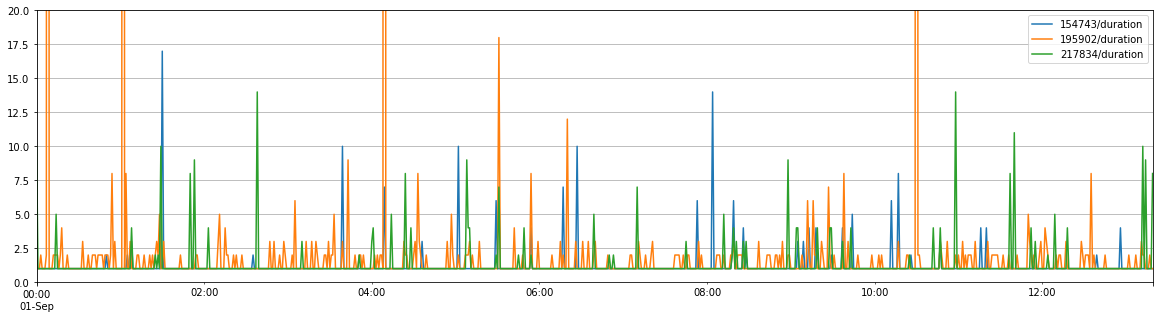

In [276]:
# Select a subset for plotting
df_small=df.iloc[:800,:3]
df_small
df_small.plot(logy=False,ylim=(0,20), figsize=(20,5), grid=True)

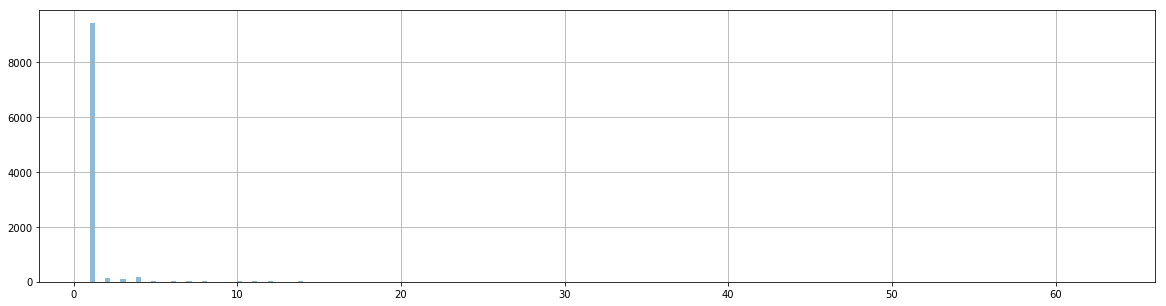

In [277]:
df['154743/duration'].hist(figsize=(20,5),bins=200, alpha=0.5)

(0, 50)

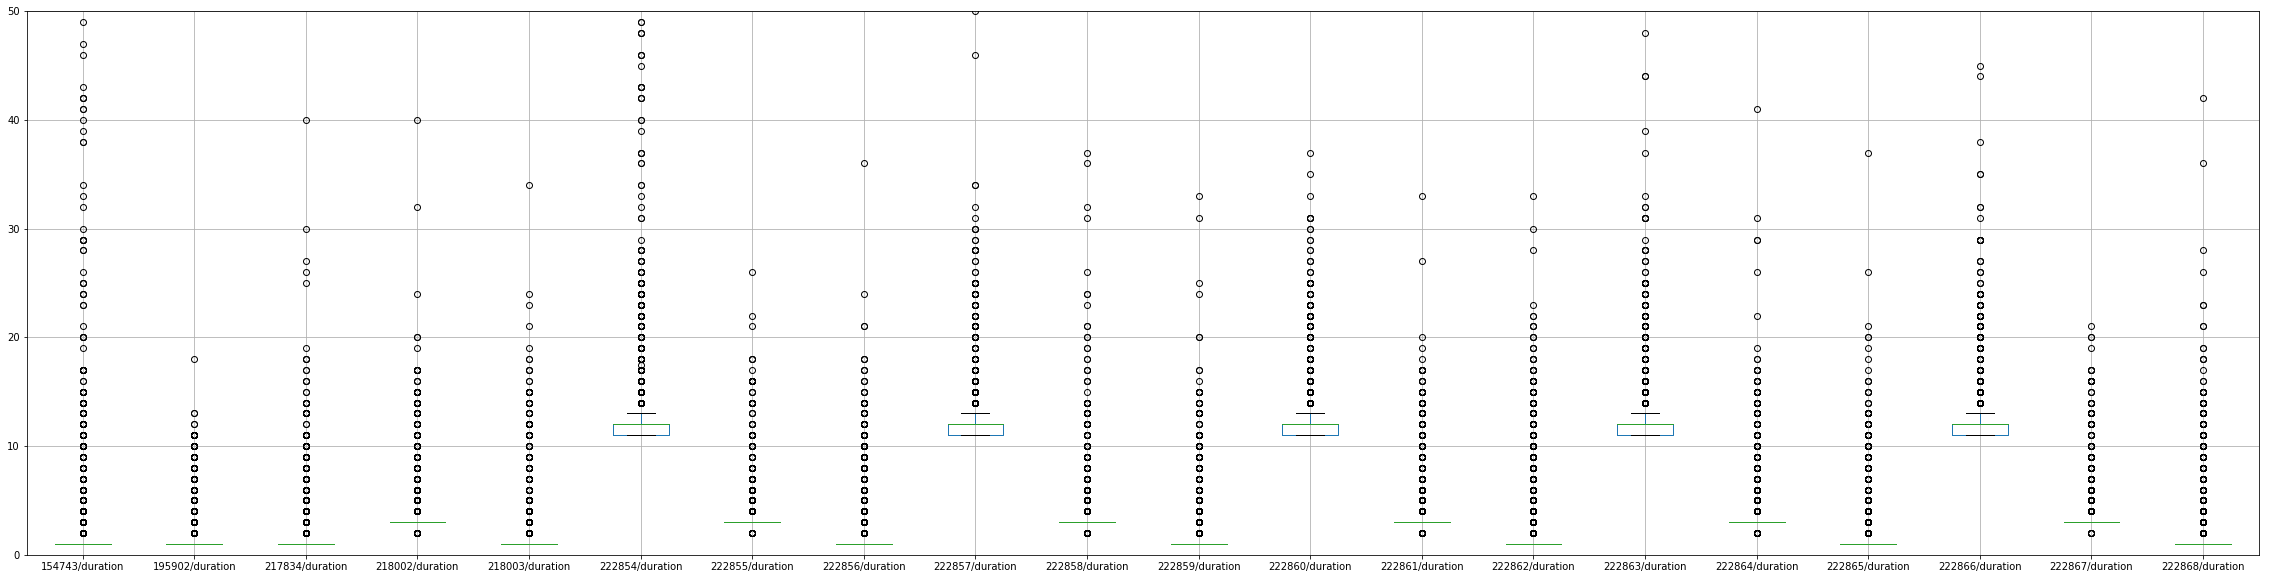

In [279]:
from matplotlib import pyplot as plt
plt.figure(1, figsize=(40,10))
df.boxplot()
plt.ylim(0,50)

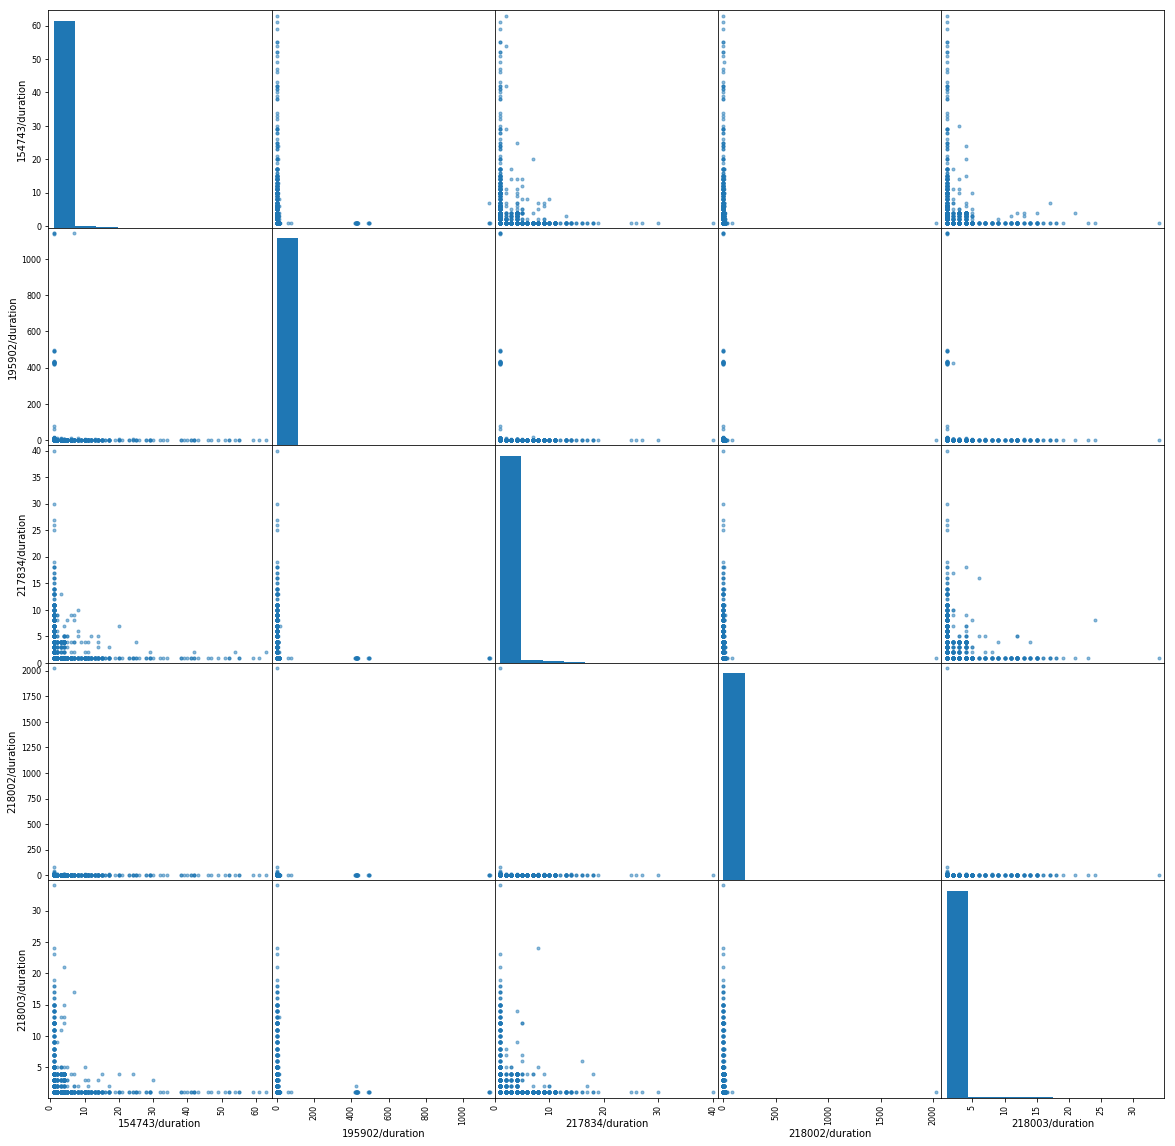

In [280]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df.iloc[:,:5],figsize=(20,20));

In [172]:
d.iloc[:10,0:3]

,a,b,c
2016-02-01,1,2,3
2017-01-01,4,5,6


In [173]:
d["a"] + d["b"]

2016-02-01    3
2017-01-01    9
dtype: int64

## SciKitLearn

- Homepage: http://scikit-learn.org/
- Reference: http://scikit-learn.org/stable/modules/classes.html

- Features:
  - Regressions
  - Classification (SVM, Nearest Neighbour)
  - Clustering

In [283]:
A=df.values

In [294]:
(np.isnan(A)).any()

True

In [302]:
B=A[:,:20].T.copy()

In [303]:
B[np.isnan(B)] = 0

(0, 50)

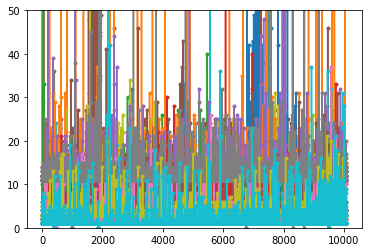

In [305]:
plt.plot(B.T,".-")
plt.ylim(0,50)

[ 0.47462587  0.21915175  0.14605777  0.0653382   0.04577288]


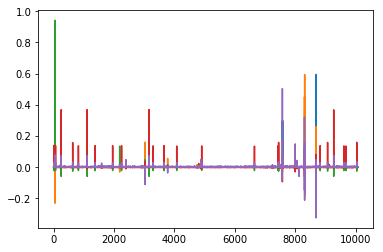

In [317]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(B)
print(pca.explained_variance_ratio_)
plt.plot(pca.components_.T)

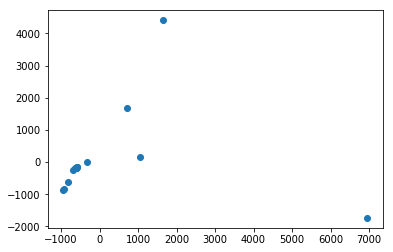

In [316]:
C = pca.transform(B)
plt.scatter(C[:,0],C[:,1])